In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
results_filename = "results-eval_final/1-results.csv"

In [3]:
results_df = pd.read_csv(results_filename, index_col=0)

In [4]:
results_df

,Sentence,Pre-processed sentence,textblob-subjectivity,vader-pos,vader-neg,vader-neu,vader-compound,vader-polarity,sentiment-category,manual eval
0,"OK, so task number one.",ok task number one,0.500000,0.636,0.0,0.364,0.3612,Positive,NaN,Neutral
3,OK.,ok,0.500000,1.000,0.0,0.000,0.2960,Positive,NaN,Positive
4,So there is no.,no,0.000000,0.000,1.0,0.000,-0.2960,Negative,NaN,Negative
5,Uhm?,uhm,0.000000,0.000,0.0,1.000,0.0000,Neutral,NaN,Neutral
6,Tabs.,tabs,0.000000,0.000,0.0,1.000,0.0000,Neutral,NaN,Neutral
...,...,...,...,...,...,...,...,...,...,...
868,"On having everything you need, so I'd say over...",everything need would say overall three,0.000000,0.000,0.0,1.000,0.0000,Neutral,NaN,Neutral
869,I'd say I'd say.,would say would say,0.000000,0.000,0.0,1.000,0.0000,Neutral,NaN,Neutral
870,Uhm?,uhm,0.000000,0.000,0.0,1.000,0.0000,Neutral,NaN,Neutral
871,"Yeah, three OK 33 seems good enough.",yeah three ok 33 seem good enough,0.533333,0.646,0.0,0.354,0.7430,Positive,NaN,Positive


In [5]:
cm = pd.crosstab(results_df['manual eval'], results_df['vader-polarity'], rownames=['manual eval actual'], colnames=['vader-polarity predicted'])

In [6]:
cm

vader-polarity predicted,Negative,Neutral,Positive
manual eval actual,,,
Negative,73,16,19
Neutral,31,458,112
Positive,0,8,116


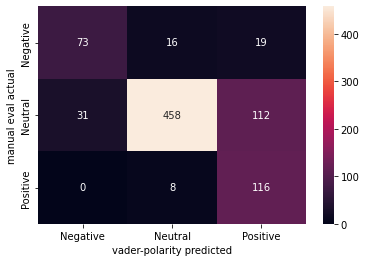

In [7]:
sn.heatmap(cm, annot=True, fmt='g')
plt.show()

In [8]:
actual = results_df['manual eval'].tolist()
predicted = results_df['vader-polarity'].tolist()

In [9]:
metrics = classification_report(actual,predicted)
print('Classification report : \n',metrics)

Classification report : 
               precision    recall  f1-score   support

    Negative       0.70      0.68      0.69       108
     Neutral       0.95      0.76      0.85       601
    Positive       0.47      0.94      0.63       124

    accuracy                           0.78       833
   macro avg       0.71      0.79      0.72       833
weighted avg       0.85      0.78      0.79       833

